<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/05-Time_Series/A-Introduction_to_Time_Series_using_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Time Series and Forecasting

*Based on the book [Introduction to Time Series and Forecasting](https://link.springer.com/book/10.1007/978-3-319-29854-2) by Brockwell and Davis.*



In [1]:
#@title Setup
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

## What is a Time Series?

A time series is a set of observations $x_t$, each one being recorded at a specific time $t$. In our sessions, we focus on **_discrete_** time series, where observations are recorded at fixed time intervals (e.g., once an hour, or every 30 seconds, or every 7 days). 

We only consider **_regular_** time series, where we the time between observations is constant (i.e., we do not consider account deposits or withdrawals from an ATM that happen at various times; these are examples of an irregular time series).

## Examples of Time Series



### Australian red wine "sales", (thousands of litres) monthly, Jan 80 - Oct 91

The file [`australian-wine-sales.txt`](https://storage.googleapis.com/datasets_nyu/australian-wine-sales.txt) contains the monthly sales of Australian red wines in for the period Jan-1980 to Oct-1991. Let's take a peak at the data file: We will use Pandas and the `pd.read_csv` function to read the text file into a dataframe. 

In [2]:
url = "https://storage.googleapis.com/datasets_nyu/australian-wine-sales.txt"
df = pd.read_csv(url, sep='\t')

##### What is this code?
# The `read_csv` command can read directly from a URL, so we pass directly 
# the URL of the dataset as a parameter. Also, since the file uses the 
# tab character to separate the columns, we pass the `sep='\t'` option to 
# the `read_csv` command, indicating that the separator is the "tab"
# (i.e. `\t` ) character.


In [3]:
df.head(10)

,Date,Sales
0,Jan-80,464
1,Feb-80,675
2,Mar-80,703
3,Apr-80,887
4,May-80,1139
5,Jun-80,1077
6,Jul-80,1318
7,Aug-80,1260
8,Sep-80,1120
9,Oct-80,963


We can try to plot the time series:

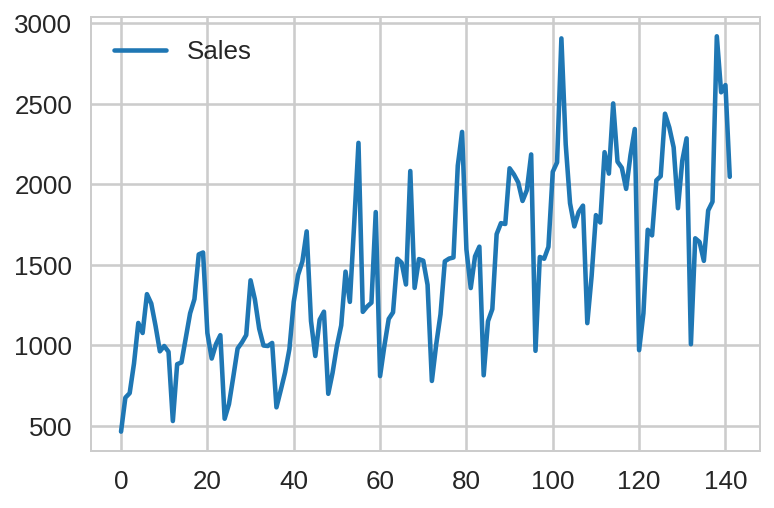

In [4]:
df.plot()

The plot would look better if we had the x-axis to be a date, instead of a number. By default, Pandas uses the "index" of the dataframe as the x-axis.



Let's check the data types that Pandas inferred:

In [5]:
df.dtypes

Date     object
Sales     int64
dtype: object

In this case pandas figured out that `Sales` is a number, but not that `Date` is a date. The following two commands convert the two columns into a date and a numeric data type, respectively. (Technically, we could skip the conversion for `Sales` but I want to show how we convert data types.)

We will set  the `Date` column to be the index of the dataframe, so that we can plot the sales with dates as the x-axis.

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df["Sales"] = pd.to_numeric(df["Sales"])

In [7]:
df = df.set_index("Date")
df

,Sales
Date,
1980-01-01,464
1980-02-01,675
1980-03-01,703
1980-04-01,887
1980-05-01,1139
...,...
1991-06-01,1892
1991-07-01,2920
1991-08-01,2572


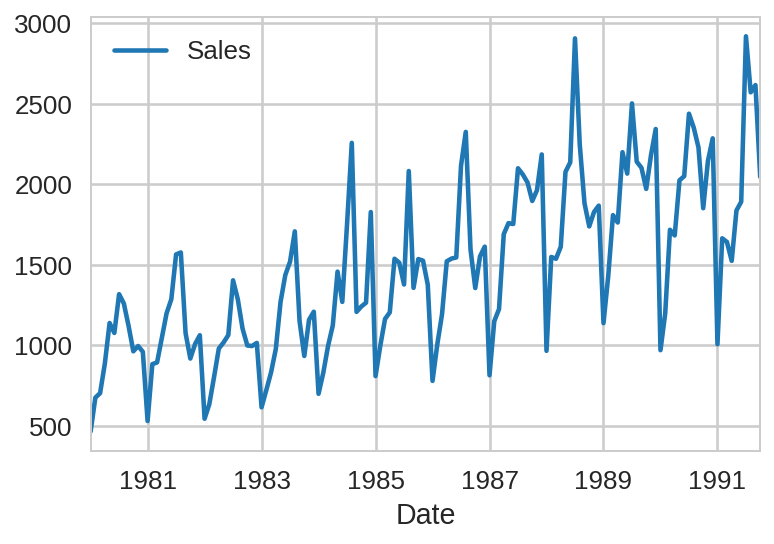

In [8]:
df.plot()

It appears from the graph that the sales have an upward trend and a seasonal pattern with a peak in July and a trough in January.

## Analyzing Time Series: Autocorrelation

A commonly analyzed property of a time series is the **autocorrelation** of the sequential observations. Simply stated, a high degree of autocorrelation means that if we know the value at time $t$, we can predict well the value at $t+1$.

Using the `autocorr` function, we estimate the autocorrelation of our `Sales` time series:

In [9]:
df["Sales"].autocorr()

0.7367146692936072

The concept of autocorrelation can extend to longer time periods, and not just to $t$ and $t+1$. We can extract autocorrelation for various **lag** values.

In [10]:
df["Sales"].autocorr(lag=1) # same as simply df["Sales"].autocorr()

0.7367146692936072

In [11]:
# Correlation between t and t+2
# ie sales now and 2 months later
df["Sales"].autocorr(lag=2)

0.6024360861159858

In [12]:
# Correlation between t and t+3
# ie sales now and 3 months later
df["Sales"].autocorr(lag=3)

0.5104183331557987

### Lag plots and  autocorrelation plots

Pandas provides two types of plots that can be used for the analysis of time series: the `lag_plot` and the `autocorrelation_plot`. We can also use the seasonal decomposition functionality of `statsmodels` to separate the time series into a trend, seasonal component, and residual noise. We will go quickly over these for now, mainly for demo purposes. Proper treatment of these topics require deeper analysis.



#### Lag plot

By default, the lag plot shows the value of the series at time $t$ vs. its value at time $t+1$. If there is no dependency (i.e., the time series is noise) then the lag plot is a scatterplot without any sign of correlation. If we can see a pattern and a correlation, then the series exhibits autocorrelation. For example, below we can see that there is a rather strong correlation of the two variables, indicating that the sales in time $t+1$ is similar to the sales at time $t$.

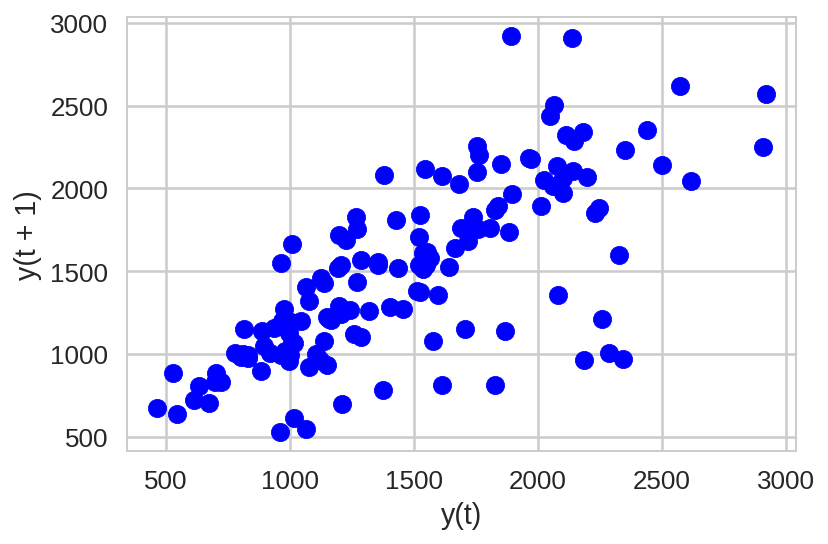

In [13]:
pd.plotting.lag_plot(df["Sales"], lag = 1, c='b')

In [14]:
# The plot above shows the autocorrelation of the t and t+1
# is around 0.73
df["Sales"].autocorr(lag=1)

0.7367146692936072

Here is the lag plot, where we plot $t$ and $t+12$. Notice that we have a higher correlation (less spread out points)

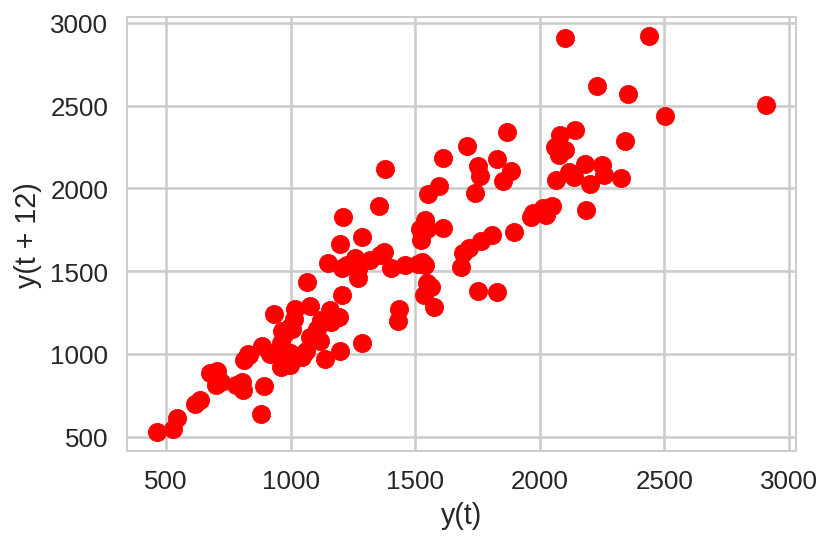

In [15]:
pd.plotting.lag_plot(df["Sales"], lag = 12, c='r')

In [16]:
df["Sales"].autocorr(lag=12)

0.903237336203241

Let's plot the two of them together.

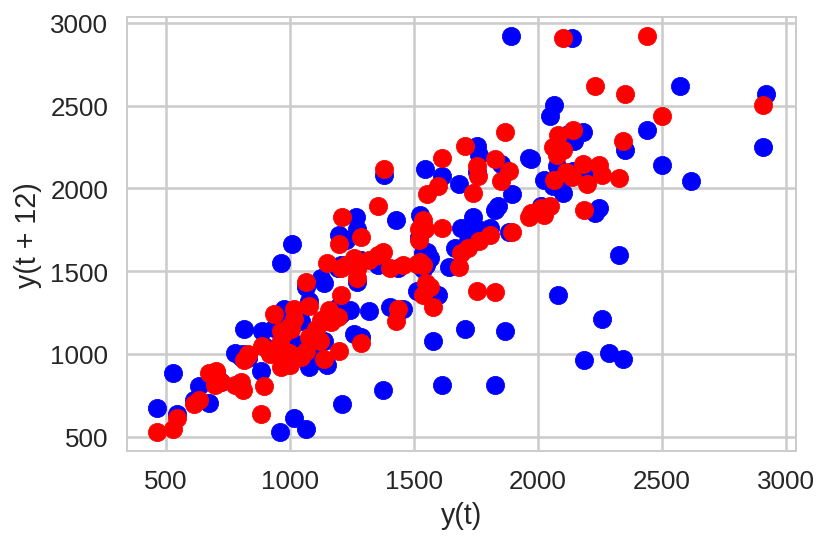

In [17]:
pd.plotting.lag_plot(df["Sales"], lag = 1, c='b')
pd.plotting.lag_plot(df["Sales"], lag = 12, c='r')

#### Autocorrelation Plot

In a more general setting, we want to also see if the value of the series at time $t$ is predictive of the value at time $t+n$. Such dependency would indicate that there is *autocorrelation* in the series. The autocorrelation plot shows the correlation value for various values of $n$.

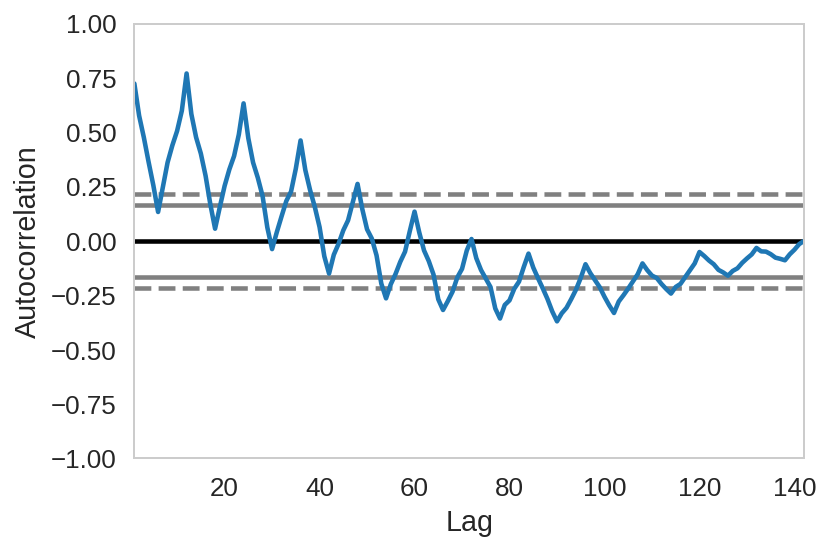

In [18]:
pd.plotting.autocorrelation_plot(df["Sales"])

The plot above, with the oscillating autocorrelation values indicate that there is a **seasonality** component in the time series. (As we see that the correlation in 12-month increments to go up and then down.) 

Let's see next how we can extract the seasonal component.

## Trend and Seasonal Decomposition



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

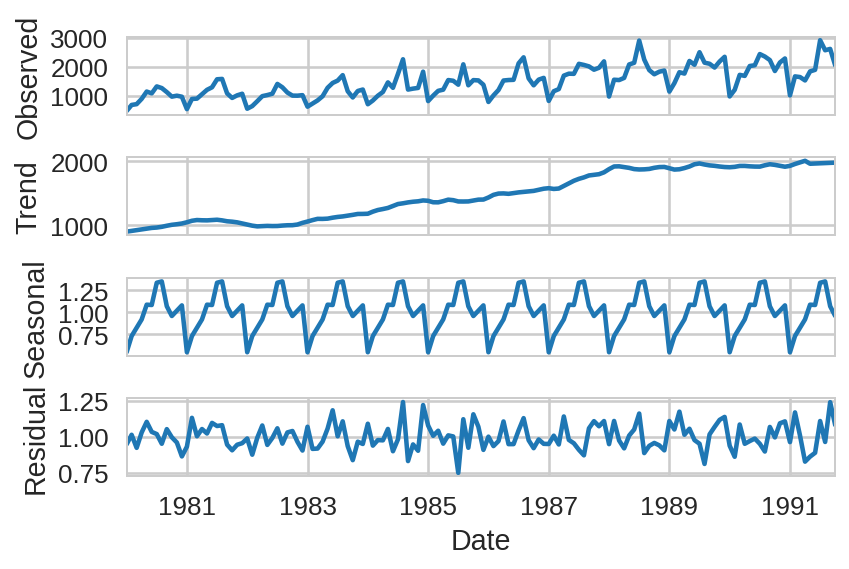

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# We decompose assumming a 12-month periodicity. 
# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]
decomposition = seasonal_decompose(df['Sales'], model='multiplicative', freq=12, extrapolate_trend='freq')  
fig = plt.figure()
fig = decomposition.plot()

#### Accessing indinvidual components of the decomposition

Once we have the decomposed time series model, we can also access the different components.

For example, we can get the trend of the time series, after removing the seasonality component:

In [20]:
# The outcome is a pandas Series, which is effectively the same as a single column of dataframe
decomposition.trend

Date
1980-01-01     902.453574
1980-02-01     914.104652
1980-03-01     925.755730
1980-04-01     937.406808
1980-05-01     949.057887
                 ...     
1991-06-01    1962.804099
1991-07-01    1966.218143
1991-08-01    1969.632187
1991-09-01    1973.046232
1991-10-01    1976.460276
Name: Sales, Length: 142, dtype: float64

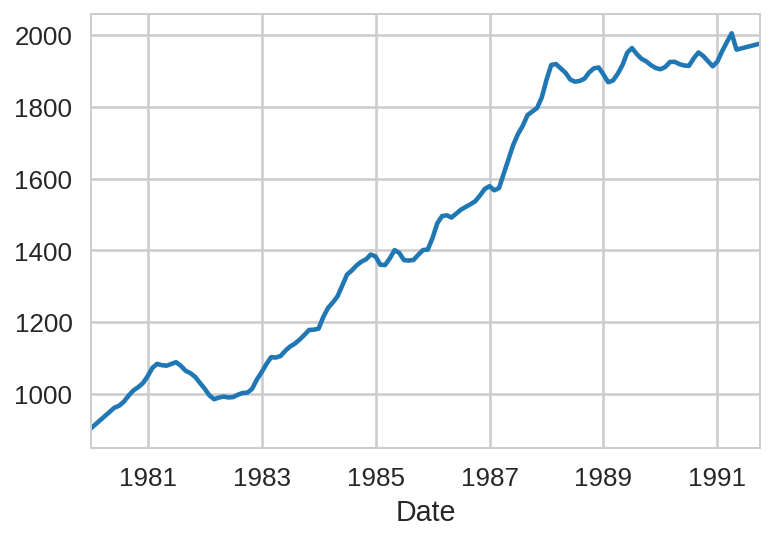

In [21]:
decomposition.trend.plot()

## Exercise

* Below we fetch the daily number of vehicular accidents in NYC.
* Examine the autocorrelation structure of the accidents.
* Perform a decomposition of the time series into a trend, seasonal, and residual component.
* Try out both the additive and the multiplicative approach for the decomposition. Try to interpret and understand the difference in the reported seasonal component.
* Instead of counting accidents, extract the number of injuries and perform the same analysis.

In [22]:
!sudo pip install -U -q PyMySQL sqlalchemy sql_magic 

     |████████████████████████████████| 43 kB 1.6 MB/s 


In [23]:
from sqlalchemy import create_engine

conn_string = 'mysql+pymysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org', 
    user = 'student',
    password = 'dwdstudent2015', 
    db = 'collisions',
    encoding = 'utf8mb4')

mysql_conn = create_engine(conn_string).connect()

sql = '''
  SELECT date_format(DATE_TIME,'%%Y-%%m-%%d') AS acc_date, COUNT(*) AS accidents 
  FROM collisions.collisions 
  GROUP BY date_format(DATE_TIME,'%%Y-%%m-%%d')
  ORDER BY date_format(DATE_TIME,'%%Y-%%m-%%d')
'''

acc = pd.read_sql(sql, con=mysql_conn)
acc['acc_date'] = pd.to_datetime(acc['acc_date'])
acc = acc.set_index('acc_date').resample('1D').sum()

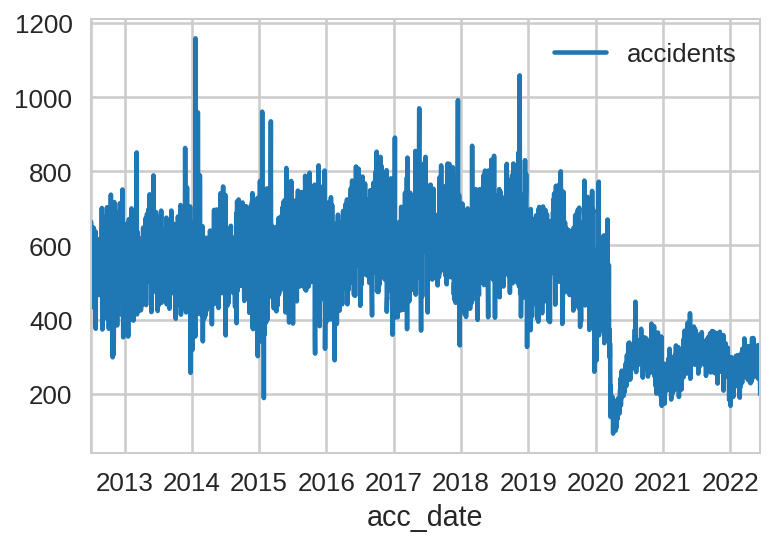

In [24]:
acc.plot()

### Solution

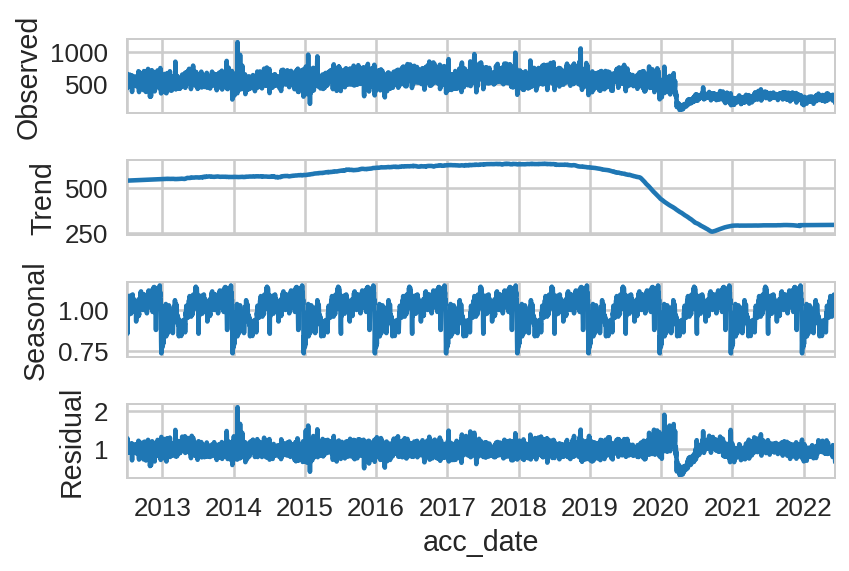

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# We decompose assumming a 12-month periodicity. 
# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]

period = 365 # We have daily observations, and we consider one year (365 days) 
             # as the maximum seasonality period
decomposition = seasonal_decompose(acc['accidents'], 
                                   model='mutiplicative', 
                                   freq=period, 
                                   extrapolate_trend='freq'
                )  
fig = decomposition.plot()

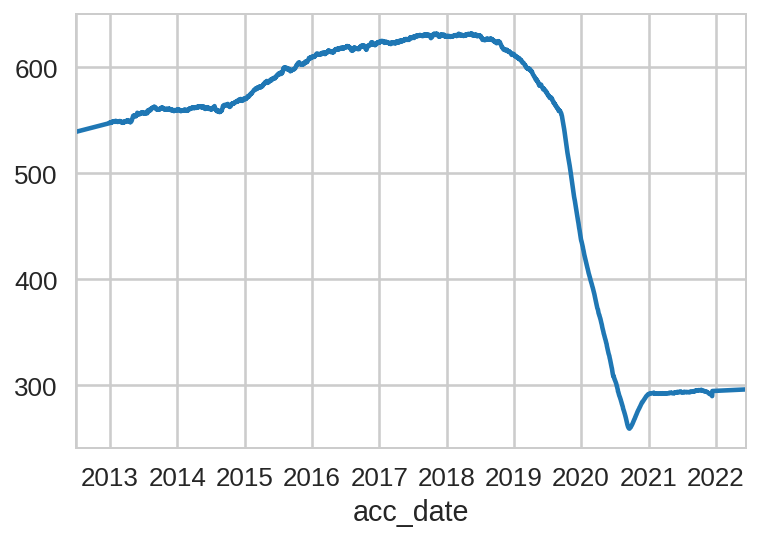

In [34]:
# Plot the trend
decomposition.trend.plot()

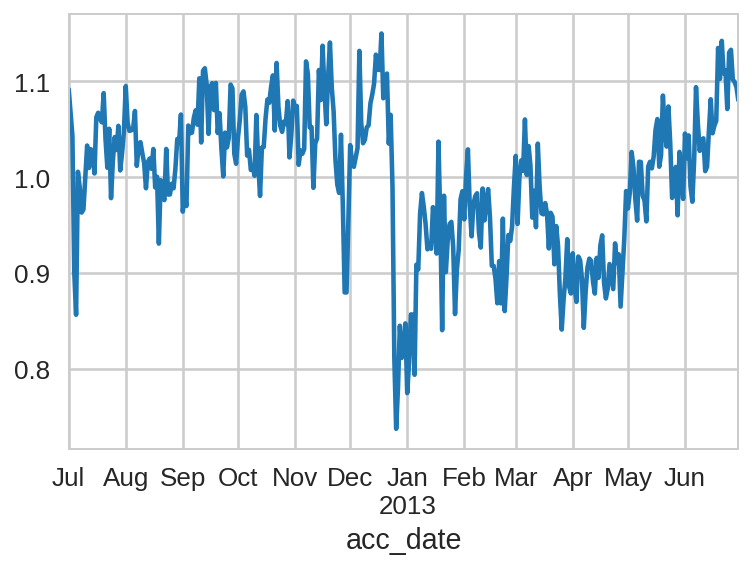

In [33]:
# Plot the seasonal component for the first year of data
decomposition.seasonal[0:period].plot()

## Advanced: Time Series Window operations: Rolling / Expanding / EW

One question that comes up when we have a periodic time series is: "How can I figure out the overall trend?". In the examples above, we relied on a "black box" where we simply asked for the time series to be decomposed into a trend, seasonal, and residual component. Now, let's dig a bit deeper on how we can extract trend components that are unaffected by seasonality.

For that, we often rely on "window" functions, that operate over a set of continuous time series points. For example, if we have a time series that has a 12-month seasonality, we can take the 12-month average, which will not exhibit seasonality, but will capture the trend. 

These windows functions are common time series operations. Pandas provides support for various types of windows. Here are a few that are commonly used: 
* [Rolling window](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html): We compute the function over a time period equal to a window
* [Expanding](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.expanding.html): We compute the function over a period of 1, 2, 3,... instances.
* [Exponential weighting](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html): We keep a window of a fixed size but we weight less and less (exponentially) the old data points.

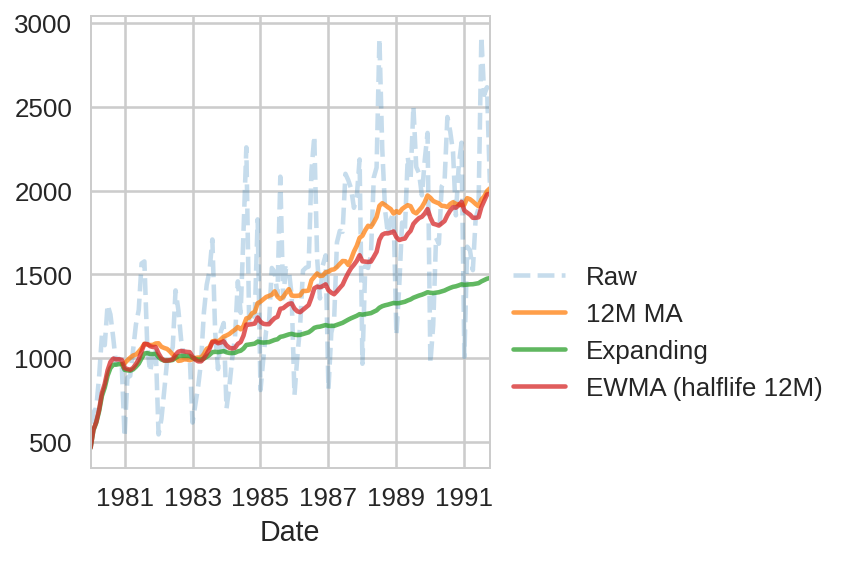

In [26]:
# Use different linestyle, and use high alpha to make the series less visually prominent
df['Sales'].plot(label='Raw', linestyle ="--", alpha=0.25)

# Plot the 12-month moving average
df['Sales'].rolling(12).mean().plot(label='12M MA', alpha=0.75)

# Plot the expanding mean. This is the mean of the series from the beginning till that point in time
df['Sales'].expanding().mean().plot(label='Expanding', alpha=0.75)

# Plot the exponentially weighted moving average. This moving average weighs more heavily the newer
# data points and weighs less the old ones. 
df['Sales'].ewm(halflife=12).mean().plot(label='EWMA (halflife 12M)', alpha=0.75)

# places the legend to the right side (1) and middle of the y-axis (0.5)
plt.legend(bbox_to_anchor=(1, .5)) 
plt.tight_layout()